# What your Shoes say about you?

## Project description

The goal of this assignment is to predict people's personalities by looking at images of their shoes. For the purpose of this assignment, various shoe types will be assigned to different personality types. This includes the following:
 - Slipper flats, athletic and flat sandals --> Laid back
 - Knee High, Mid-Calf, and Over the Knee Boots --> Take charge
 - Ankle Boots --> Always looking ahead
 - Heels --> Self-confident
 - Sneakers --> Get along with everyone

## Imports

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2023-11-06 11:50:05.872785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

### Preprocessing Training Set

In [2]:
# create data generator specifying 20% of dataset for validation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

# create training set
training_set = train_datagen.flow_from_directory('./data/train/',
                                                 target_size=(64, 64),
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 subset='training')

# create validation set
validation_set = train_datagen.flow_from_directory('./data/train/',
                                                   target_size=(64, 64),
                                                   batch_size=128,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 24491 images belonging to 5 classes.
Found 6121 images belonging to 5 classes.


### Preprocessing Test Set

The Test Set is situated in a distinct folder separate from the training set and comprises a unique set of images that differ from those in the training set. This test set encompasses approximately 20% of the total images within the dataset.

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./data/test/',
                                            target_size=(64, 64),
                                            batch_size=128,
                                            class_mode='categorical')

Found 7551 images belonging to 5 classes.


## Build CNN Model

### 1. Initialize Model

In [4]:
model = tf.keras.models.Sequential()

### 2. Add First Convolution Layer 

In [5]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

### 3. Pool First Layer

In [6]:
model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### 4. Add Second Convolutional Layer

In [7]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))

### 5. Pooling Second Layer

In [8]:
model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### 6. Flatten

In [9]:
model.add(tf.keras.layers.Flatten())

### 7. Full Connection

In [10]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

### 8. Output Layer

Use 5 units since there are 5 classes: 
1. Laid back  
2. Always looking ahead  
3. Get along with everyone  
4. Self-confident  
5. Take charge  

In [11]:
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

### 9. Compile CNN

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

## Train CNN and Evaluate

In [13]:
history = model.fit(x=training_set, validation_data=validation_set, epochs=5)

192/192 [==============================] - 119s 612ms/step - loss: 0.8206 - accuracy: 0.6935 - val_loss: 0.4992 - val_accuracy: 0.8175


## Check Model Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


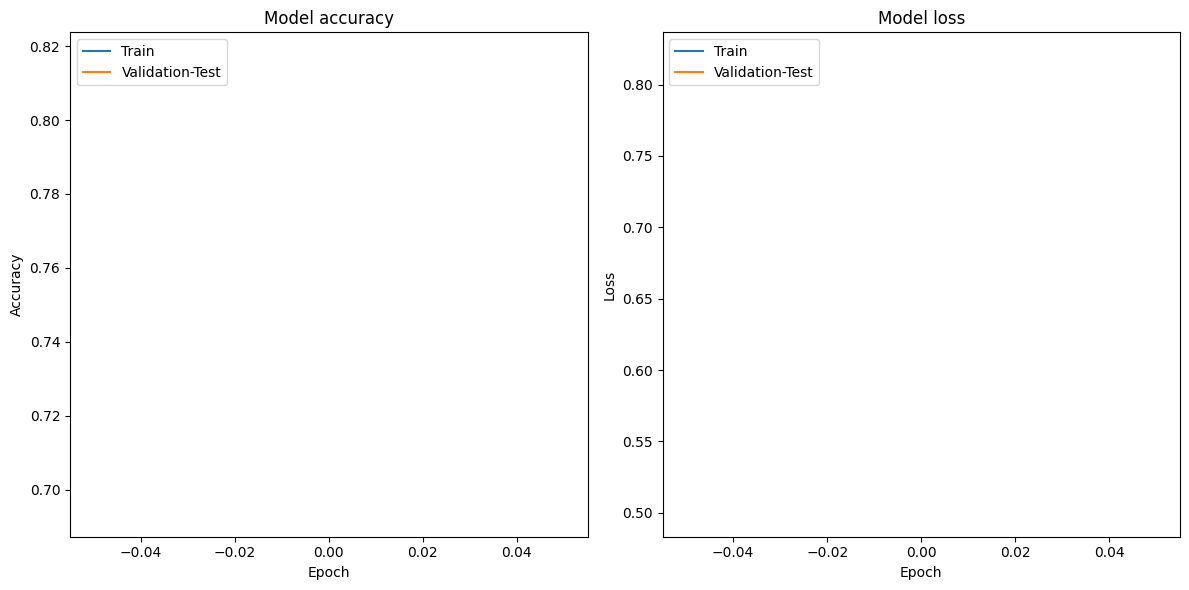

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
test_accuracy = model.evaluate(test_set, verbose=2)
print(f'Test Accuracy: {test_accuracy[1]}')

59/59 - 13s - loss: 0.5189 - accuracy: 0.8035 - 13s/epoch - 222ms/step
Test Accuracy: 0.803469717502594


## Analysis and Conclusion